<a href="https://colab.research.google.com/github/chaehyun29/MLDL/blob/main/chpt3_2%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형 회귀
최근접 이웃들의 평균을 구하여 타깃값을 예측한다.

농어들의 길이와 무게 샘플들이 있고, 새 농어의 길이 값만 있다면 무게를 예측할 수 있다.
 - 특성 : 농어의 길이
 - 타깃 : 농어의 무게

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

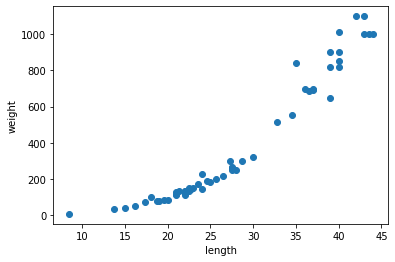

In [ ]:
#먼저 데이터가 띠고 있는 형태를 확인하기 위해 산점도를 그려보자

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련세트와 테스트 세트 나누기

사이킷 런에 사용할 훈련 세트는 2차원 배열이어야 한다.
perch_length가 1차원배열이기 때문에  train,test input도 1차원이다

=>열이 하나인 2차원 배열로 바꿔주자

 - np.array.reshape() : 원하는 구조로 배열을 바꿔준다. 원소 수가 다르면 에러가 발생됨

   ㄴ np.array.reshape(-1,1) : -1이면 나머지 원소개수로 알아서 모두 채워주고 두번째 크기는 1로 한다는 뜻

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,random_state=42)

print(train_input.shape)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42,)
(42, 1) (14, 1)


##KNeighborsRegressor 사이킷런 k-최근접 이웃 회귀 알고리즘
KNeighborsClassifier와 매우 비슷하다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input,train_target)

# 테스트 점수 확인
knr.score(test_input, test_target)

0.992809406101064

##결정계수
회귀에서는 이 점수를 결정 계수라고 한다.

결정계수 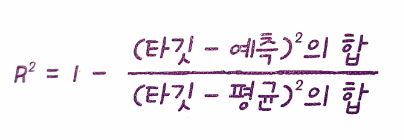
